#### Importando as LIBS

In [198]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import openpyxl 
import datetime as dt
import seaborn as sns

#### Importando os dados Ibovepa

In [199]:

ibovespa = yf.download(tickers='^BVSP', period='ytd')['Adj Close']

[*********************100%***********************]  1 of 1 completed


#### Verificando DataFrame

In [200]:

ibovespa.head(15)

Ticker,^BVSP
Date,
2024-01-02,132697.0
2024-01-03,132834.0
2024-01-04,131226.0
2024-01-05,132023.0
2024-01-08,132427.0
2024-01-09,131447.0
2024-01-10,130841.0
2024-01-11,130649.0
2024-01-12,130988.0


#### Valores duplicados

In [201]:
ibovespa.duplicated().sum()

np.int64(6)

#### Info

In [202]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2024-01-02 to 2024-12-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   246 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


#### Estatisticas

In [203]:
ibovespa.describe()

Ticker,^BVSP
count,246.000000
mean,128392.755716
std,3726.479905
min,119138.000000
25%,126448.750000
50%,128136.000000
75%,130554.750000
max,137344.000000


#### Estilos do gráfico

In [204]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### média móvel

In [205]:
media_movel = ibovespa['^BVSP'].rolling(5).mean()

#### Gráfico

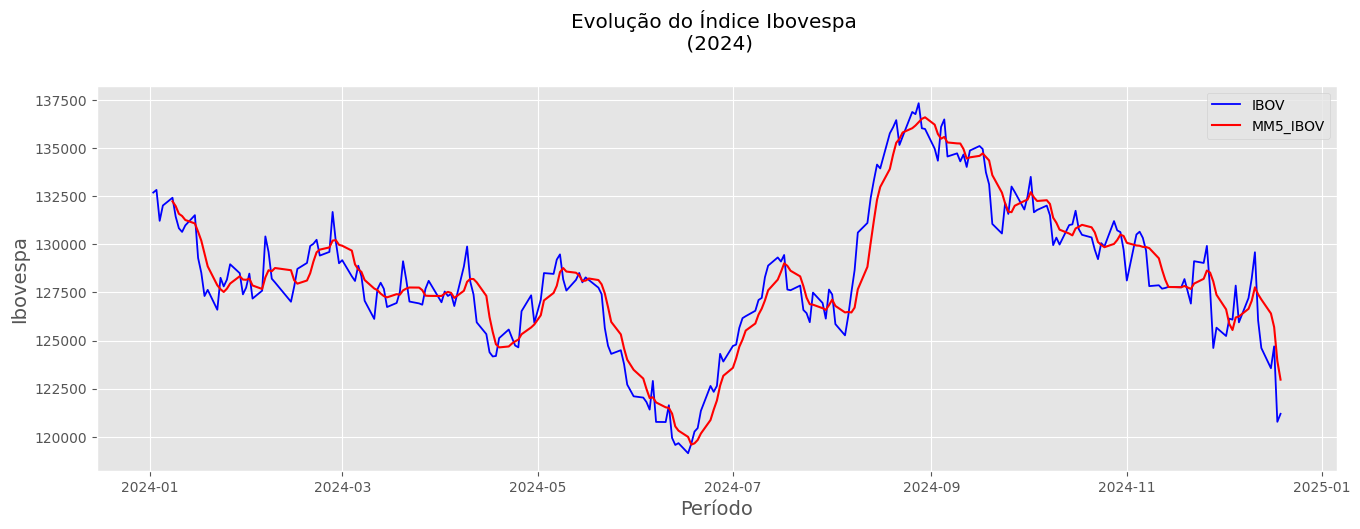

In [206]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa \n (2024)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


#### Carteira de ativos 

In [207]:
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='ytd')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-02,32.008797,14.497677,35.979408
2024-01-03,33.008545,14.414621,36.254883
2024-01-04,32.728954,14.239284,35.772797
2024-01-05,32.805206,14.119316,35.389099
2024-01-08,32.559505,14.091631,35.477642
...,...,...,...
2024-12-13,38.099998,9.260000,57.660000
2024-12-16,37.939999,9.100000,57.110001
2024-12-17,38.299999,9.190000,57.900002


#### Informações da Carteira

In [208]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  246 non-null    float64
 1   VALE      245 non-null    float64
 2   WEGE3.SA  246 non-null    float64
dtypes: float64(3)
memory usage: 7.9 KB


#### Verificando valores nulos da carteira

In [209]:
carteira.isnull().sum()

Ticker
PETR4.SA    6
VALE        7
WEGE3.SA    6
dtype: int64

#### Mapa de calor nulos

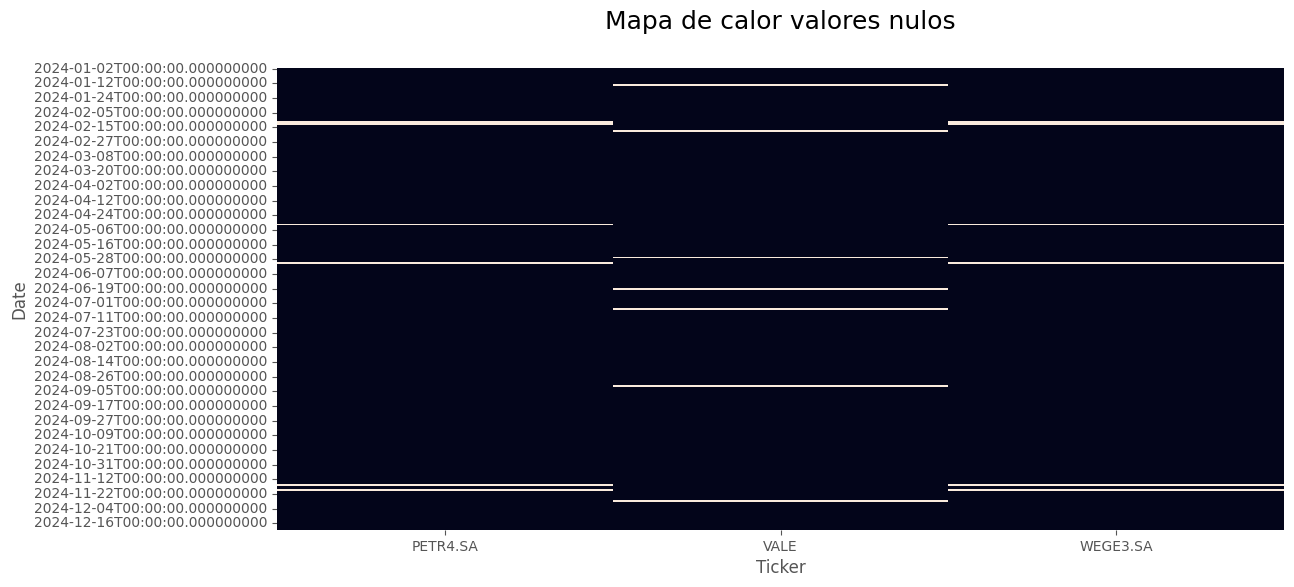

In [210]:
plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

#### Estatisticas da Carteira

In [211]:
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,246.000000,245.000000,246.000000
mean,34.863717,11.275855,44.638140
std,1.879869,1.074946,8.490496
min,30.204176,8.740000,31.817717
25%,33.773427,10.491804,37.698483
50%,34.916979,11.100000,41.678923
75%,36.027735,12.102219,53.823178
max,39.038258,14.497677,58.549999


#### Excluindo valores nulos da Carteira

In [212]:

carteira.dropna(inplace=True)

#### Informações da carteira após exclusao dos valores nulos 

In [213]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2024-01-02 to 2024-12-19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  239 non-null    float64
 1   VALE      239 non-null    float64
 2   WEGE3.SA  239 non-null    float64
dtypes: float64(3)
memory usage: 7.5 KB


#### Gráfico

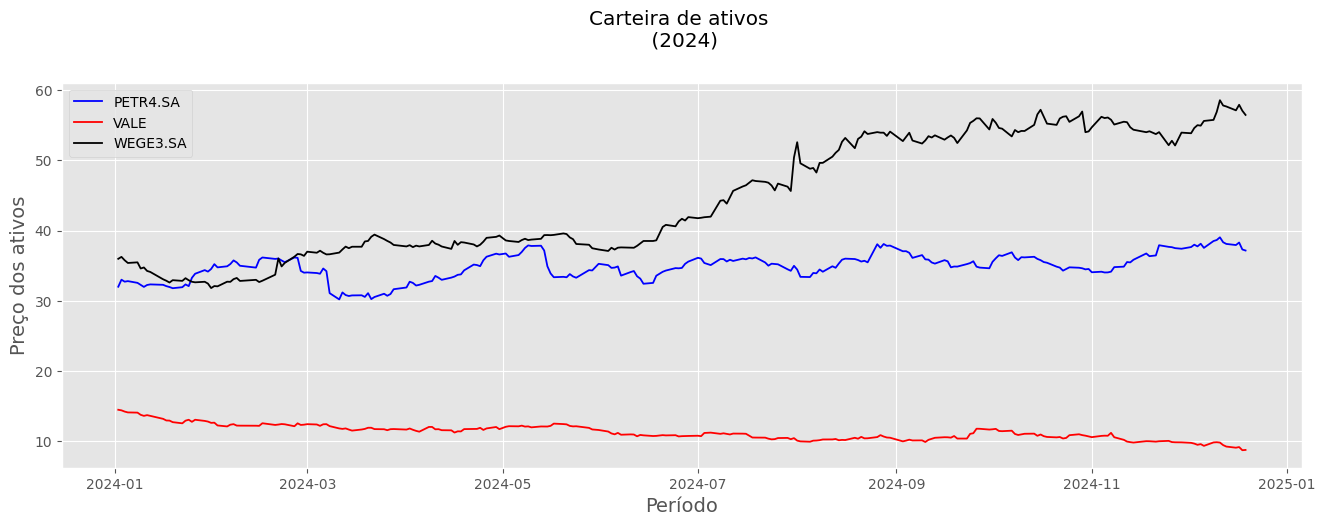

In [214]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos \n (2024)', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();


#### Normalizando os dados do ibovespa

In [215]:
ibovespa_normalizado = ibovespa / ibovespa.iloc[0]
ibovespa_normalizado.head()

Ticker,^BVSP
Date,
2024-01-02,1.000000
2024-01-03,1.001032
2024-01-04,0.988915
2024-01-05,0.994921
2024-01-08,0.997965


#### Carteira Normalizada

In [216]:
carteira_normalizada = carteira / carteira.iloc[0]
carteira_normalizada.head()

Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,1.031234,0.994271,1.007656
2024-01-04,1.022499,0.982177,0.994258
2024-01-05,1.024881,0.973902,0.983593
2024-01-08,1.017205,0.971992,0.986054


#### Gráfico : Ativos da Carteira e IBOVESPA

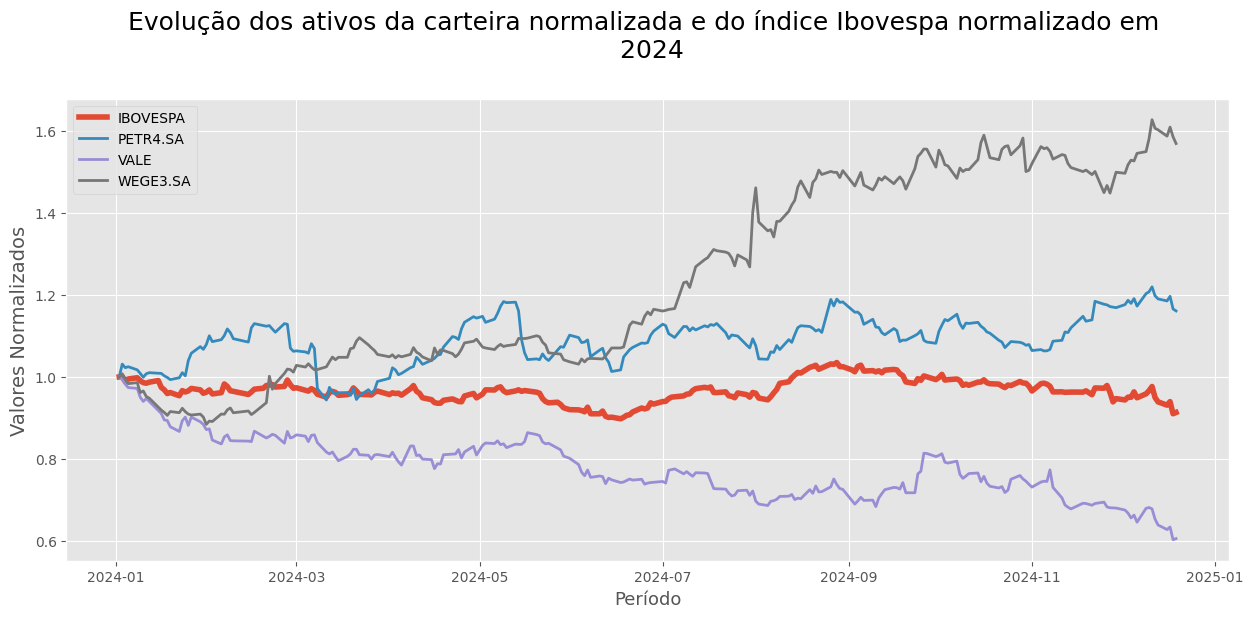

In [217]:
plt.figure(figsize=(15,6))
plt.title('Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado em \n 2024', fontsize=18, pad=30)
plt.plot(ibovespa_normalizado.index, ibovespa_normalizado['^BVSP'], linewidth=4, label= 'IBOVESPA')
plt.plot(carteira_normalizada.index, carteira_normalizada['PETR4.SA'], linewidth=2, label= 'PETR4.SA')
plt.plot(carteira_normalizada.index, carteira_normalizada['VALE'], linewidth=2, label= 'VALE')
plt.plot(carteira_normalizada.index, carteira_normalizada['WEGE3.SA'], linewidth=2, label= 'WEGE3.SA')
plt.xlabel('Período', fontsize=13)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend();